# Example of OverFitting

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [4]:
def analyzer(max_depth):
    data = pd.read_csv('datasets/Social_Network_Ads.csv')
    X = data.iloc[:, 2:4].values
    y = data.iloc[:,-1].values
    
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)
    
    a = np.arange(start=X[:,0].min() - 1, stop = X[:,0].max() + 1, step=0.1)
    b = np.arange(start=X[:,1].min() - 1, stop = X[:,1].max() + 1, step=100)
    
    XX, yy = np.meshgrid(a, b)
    
    input_array = np.array([XX.ravel(), yy.ravel()]).T
    
    labels = clf.predict(input_array)
    
    plt.contourf(XX, yy, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)

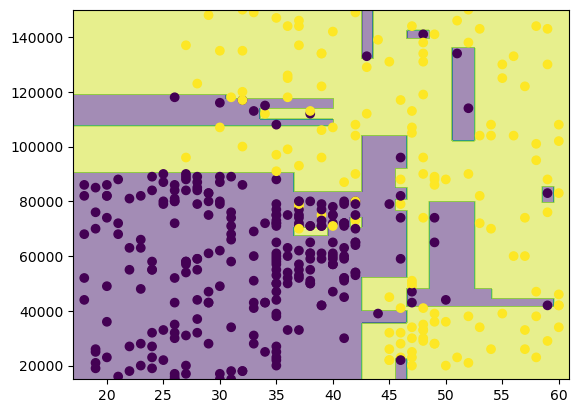

In [9]:
analyzer(10)

# Example on Irris Dataset

In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a sample dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier using entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9777777777777777


In [1]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Display the decision tree
graph = graphviz.Source(dot_data)  
graph.view()


## Using Own Dataset

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
data = {
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

In [ ]:
# Convert categorical variables to numerical
le = LabelEncoder()
for col in ['Temperature', 'Outlook', 'Humidity', 'Wind', 'Play']:
    df[col] = le.fit_transform(df[col])

# Split the dataset
X = df[['Temperature', 'Outlook', 'Humidity', 'Wind']]  # Features
y = df['Play']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

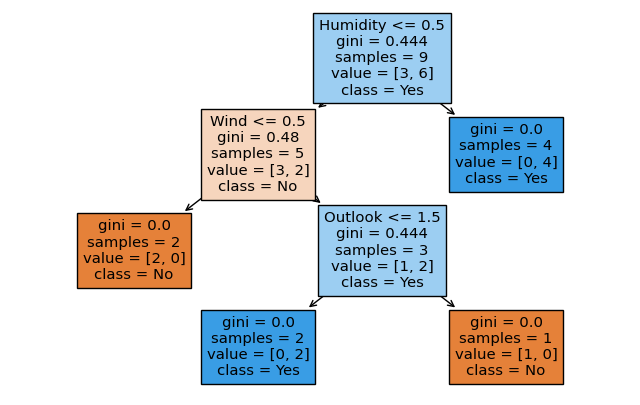

In [16]:
# Plot the decision tree
plt.figure(figsize=(8,5))
plot_tree(clf, filled=True, feature_names=['Temperature', 'Outlook', 'Humidity', 'Wind'], class_names=['No', 'Yes'])
plt.show()

In [45]:
clf.predict([[1, 1, 0, 0]])

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

C:\Users\kapil\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
print(df , X)

   Temperature   Outlook Humidity    Wind Play
0          Hot     Sunny     High    Weak   No
1          Hot     Sunny     High  Strong   No
2          Hot  Overcast     High    Weak  Yes
3         Mild      Rain     High    Weak  Yes
4         Cool      Rain   Normal    Weak  Yes
5         Cool      Rain   Normal  Strong   No
6         Cool  Overcast   Normal  Strong  Yes
7         Mild     Sunny     High    Weak   No
8         Cool     Sunny   Normal    Weak  Yes
9         Mild      Rain   Normal    Weak  Yes
10        Mild     Sunny   Normal  Strong  Yes
11        Mild  Overcast     High  Strong  Yes
12         Hot  Overcast   Normal    Weak  Yes
13        Mild      Rain     High  Strong   No     Temperature  Outlook  Humidity  Wind
0             1        2         0     1
1             1        2         0     0
2             1        0         0     1
3             2        1         0     1
4             0        1         1     1
5             0        1         1     0
6       